# Multi-armed Bandits
Notes taken from: "Reinforcement Learning" by Richard S. Sutton and Andrew G. Barto <br>
Link: http://www.incompleteideas.net/book/the-book.html 

# Intro

One important paradigm to understand when it comes to what sets apart reinforcement learning from the other learnings is that reinforcement learning uses training data to *evaluate* the actions taken rather than using it to *instruct* the model of the correct action. Purely evaluative feedback tells an agorithm how good an action is in the moment without regard to the future while purely instructive feedback tells the model the correct action to take and is essentially supervised learning.

Reinforcement learning uses heuristics from both evaluative and instructional approaches but in this notebook, we will be exaining how we can use the k-armed Bandit problem to explore the evaluative aspects of reinforcement learning

# The k-armed Bandit Problem

The k-armed Bandit problem creates a hypothetical in which you are faced with a choice among K different actions and each action corresponds to a different reward based on a stationary distribution. Your objective is to find the maximum total reward you can obtain over some time period. 

Some analogies of the k-armed Bandit Problem
- This problem is analogous to playing slot machines at a casino as you have the option to select from k levers (actions) at the casino and you would preferebly want to maximize your winnings by finding the slot machines and their levers that give you the best jackpot (reward)

- This problem is also analogous to a doctor choosing between treatments for a series of ill patients. The doctor has a selection of treatment (actions) and is motiviated to ensure the survival or well-being of each patient (reward).

Now that we understand the k-armed bandit problem lets formulate it.

So we know each k actions has an expected or mean reward given that we receive if we select that action. This is known as the value of that action. We denote the action selected on time step $t$ as $A_{t}$ and its reward as $R_{t}$. The value then of some action $a$, can be represented using $q_{*}(a)$ as the expected reward given action $a$.

> $q_{*}(a)=\mathbb{E}[R_{t} | A_{t}=a]$

We assume that we do not know the reward of each action as if we did, this wouldn't be much of a problem. However, we do assume that we can estimate the reward values of certain actions. We denote this with $Q_{t}(a)$ and we would like our estimate to be close with the actual value of $q_{*}(a)$.

So using our estimates of reward we can develop one strategy off the bat. We can pick the estimated value that yields the greatest reward in an attempt to maximize our reward. This is referred to as a **greedy** approach where we are **exploiting** our estimated reward to make a decision. If we do not pick the using the **greedy** approach, it is said that we are **exploring** and this allows us to improve our estimate of our action's rewards. It is important to know that while **greedy** approaches yield the higest estimated reward, this is only temporary, they do not provide perspective to produce greater total reward in the long run. These ideas often clash as it is not possible to both **exploit** and **explore**.

The ideal strategy often depends on the situation and is determined by the parameters of each case such as remaining actions left, uncertainties, estimates, etc. You might be thinking that it might be worth balancing and trying to optimize on both strategies, but most of the sophisticated methods that try to balance these strategies often make strong assumptions that cannot hold or cannot be verified.

However there exist some basic methods that we can fall back on to try to achieve any semblence of balance between the two approaches.

## Action-value methods

Action-value methods is defined as the methods we take for estimating the values of actions and using our estimates to make action selection decisions. With this in mind, remember that a true value of an action can be considered as the mean reward that selecting that action supplies. We can estimate this by using the following equation

$$Q_{t}(a) = \frac{\text{sum of rewards when a taken prior to t}}{\text{number of times a taken prior to t}} = \frac{\sum_{i=1}^{t-1}R_{i}*\mathbb{1}_{A_{i}=a}}{\sum_{i=1}^{t-1}\mathbb{1}_{A_{i}=a}}$$

$\mathbb{1}$ is defined as a random variable that is 1 if some condition is true and 0 if it is not. If the denominator is 0, we set $Q_{t}(a)$ to some default value, usually 0. As the denominator goes to infinity, our $Q_{t}(a)$ will begin to converge to the actual reward $q_{t}(a)$. This approach is called the **sample-average** method for estimating action values.

With this we can write a *greedy* approach as the following

$$ A_{t} = argmax_{a}Q_{t}(a)$$

Of course and approach like this misses out on potential paths that could yield better results so we can modify this to come to a *near-greedy* action where with a small probability $\epsilon$, we select from among all actions uniformly. An advantage of this approach is that it offers minimal exploration so that we can guaruntee that given infinite steps taken, our approach will eventually converge to $q_{t}(a)$. However while this is nice in theoretical guarntees, this is not very practical.

## The 10-armed Testbed

We can use a 10-armed testbed to test the performance of our strategies. We can measure the performance of our approach by runnning it for a certain amount of time steps (i.e 1000) which represents a run, and performing a certain amount of independent runs (i.e. 2000) for different bandit problems. This will allow us to obtain the algorithms average behavior.

| <img src="images/testbed.png" width="800"/> |
|:--:|
| *Fig 1:* The true reward value for each action is selected according to a normal distribution with zero mean and unit variance |

Lets test our *near-greedy* approach with different values of $\epsilon$.

| 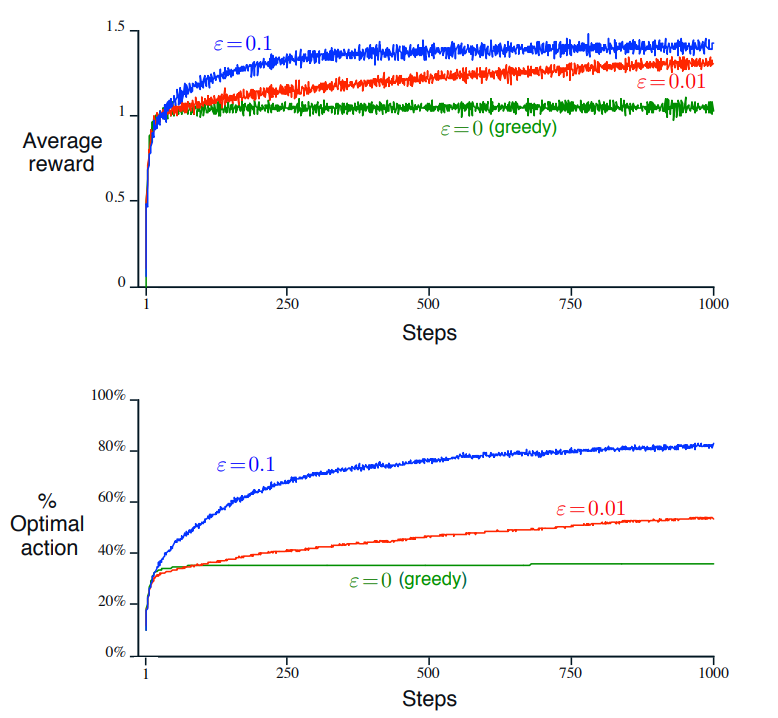|
|:--:|
| *Fig 2:* Note that the greedy algorithm will never improve as it always picks one path and if that path is not optimal there is no guarantee for it to maximize its reward. The higher values of $\epsilon$ shows that by exploring more, this will allow us to learn the estimated values of each action better allowing us to find the optimal action which will allow us to maximize our reward faster. |

In this case with a relatively tame distribution, the $\epsilon$-greedy approach does well but this is not going to apply to every case. If this problem had a 0 variance, the exploration would result in suboptimal actions being chosen and this approach would lose out to the greedy approach. However this is a contrived approach that seldom will come up in reality. It is important to consider cases in which our distributions would be non-stationary, meaning that they change over time. This would mean that an exploratory approach should be favored as we need a means to verify what the best action is at the time.

## Incremental Implementation

We need to formulate an efficient way to computationally represent our estimates. Off the bat a simple naive approach could be to simply store the value of all rewards taken for a particular action and divide it by $n$, its selection count.

$$ Q_{n}=\frac{R_{1}+R_{2}\text{...}+R_{n-1}}{n-1} $$

However looking at this it would be a pretty expensive method as we need to store every single reward and compute it each time for every new $n$. This is not feasible, so to get around this we device an incremental formula based on dynamic programming that allows us to update our predictions with small, $O(1)$ complexity. The formulation is as follows

$$Q_{n+1} = \frac{1}{n} \sum_{i=1}^{n}R_{i}$$
$$ = \frac{1}{n} (R_{n}+\sum_{i=1}^{n-1}R_{i})$$
$$ = \frac{1}{n} (R_{n}+(n-1)*\frac{1}{n-1}*\sum_{i=1}^{n-1}R_{i})$$
$$ = \frac{1}{n} (R_{n}+(n-1)*Q_{n})$$
$$ = \frac{1}{n} (R_{n}+(nQ_{n}-Q_{n}))$$
$$ = Q_{n} + \frac{1}{n}[R_{n}-Q_{n}]$$

This formulation allows us to only need to store $Q_{n}$ and $n$. This update rule can be generalized as $NewEstimate \xleftarrow \ OldEstimate\ +\ StepSize[Target - OldEstimate]$. If you look at this general equation things should seem really familiar. $StepSize[Target - OldEstimate]$ is our $error$ estimate and $StepSize$ is the size of the step we are taking towards target. With this we can formulate the psuedocode for the simple bandit algorithm.

| 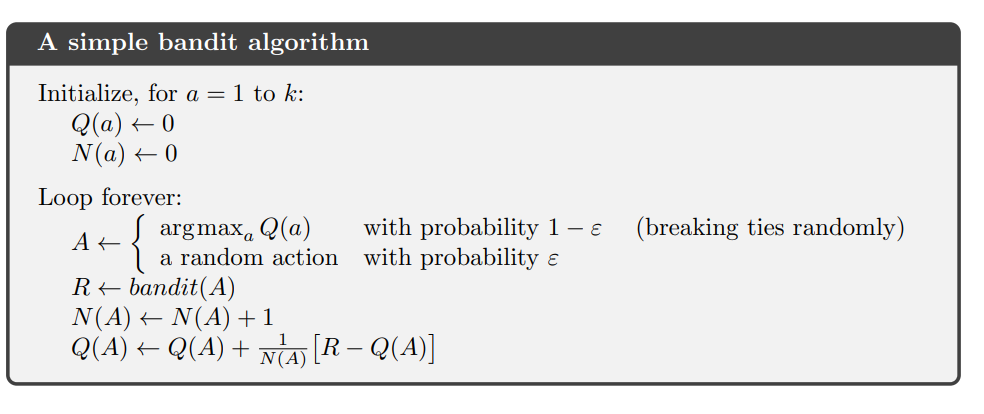 |
|:--:|

